In [1]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)


seed_everything(42)

df_train = pd.read_csv("../data/preprocessed/df_train001.csv")
df = pd.read_csv("../data/preprocessed/df.csv")

---

In [2]:
df_train.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.0,68.3,1.7,6.7,11.933,48.699342,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,11.933,48.699342,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,11.933,48.699342,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,11.933,48.699342,7.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,11.933,48.699342,-4.6


In [3]:
df_train['월'] = np.float64(df_train['일시'].str.split('-', expand=True)[1])
df_train['일'] = np.float64(df_train['일시'].str.split('-', expand=True)[2])

In [4]:
df['월'] = np.float64(df['일시'].str.split('-', expand=True)[1])
df['일'] = np.float64(df['일시'].str.split('-', expand=True)[2])

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
X = df_train.drop(columns=['일시','평균기온'], axis=1)
y = df_train['평균기온']

In [8]:
X = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

---

In [11]:
from sklearn.svm import SVR

In [12]:
model = SVR(kernel='rbf')  # 선형 커널을 사용하는 SVR
model.fit(x_train, y_train)

SVR()

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
# 학습된 모델을 사용하여 예측
y_pred = model.predict(x_test)

# 성능 평가 (예제로는 평균 제곱 오차를 사용)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.43773578505218774


---

In [15]:
sub_file = pd.read_csv("../data/original/sample_submission.csv")

In [16]:
df = scaler.transform(df.drop(columns='일시', axis=1))

In [17]:
sub_file['평균기온'] = model.predict(df)

<AxesSubplot:>

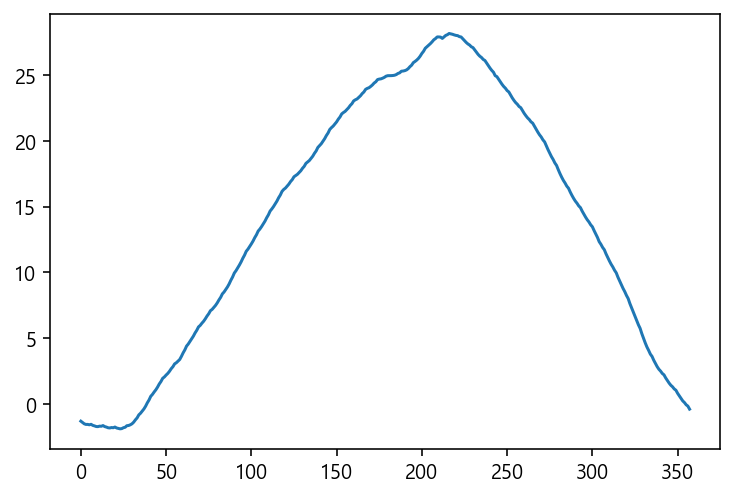

In [18]:
sub_file['평균기온'].plot()

In [19]:
sub_file.to_csv("../data/sub/025_df_SVR_002.csv",
                index=False, encoding='utf-8')

---

In [20]:
import joblib

In [21]:
joblib.dump(model, '../model/SVR_002.pkl')

['../model/SVR_002.pkl']

In [22]:
loaded_model = joblib.load('../model/SVR_002.pkl')